<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


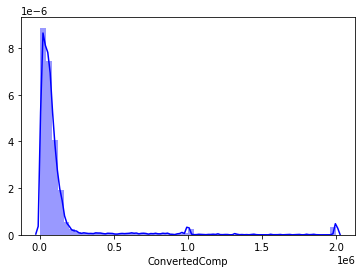

In [30]:
# your code goes here
import seaborn as sns
sns.distplot(df['ConvertedComp'], color='blue') #seaborn distribution plot

Plot the histogram for the column `ConvertedComp`.


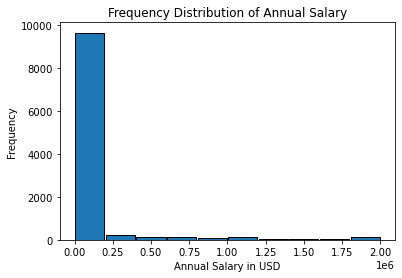

In [59]:
# your code goes here
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df['ConvertedComp'], edgecolor='black', rwidth=0.95)

plt.title('Frequency Distribution of Annual Salary')
plt.xlabel('Annual Salary in USD')
plt.ylabel('Frequency')

plt.show()

What is the median of the column `ConvertedComp`?


In [60]:
# your code goes here
print(df['ConvertedComp'].median())

57745.0


How many responders identified themselves only as a **Man**?


In [61]:
# your code goes here
print(df['Gender'].value_counts())
#10480

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [62]:
# your code goes here
print((df['ConvertedComp'][df['Gender'] == 'Woman']).median())

57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [73]:
# your code goes here
#print(df['Age'].describe())

quartiles = np.nanpercentile(df['Age'], [25, 50, 75])
data_min, data_max = df['Age'].min(), df['Age'].max()

print("Five number summary for column Age:")
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Five number summary for column Age:
Min: 16.000
Q1: 25.000
Median: 29.000
Q3: 35.000
Max: 99.000


Plot a histogram of the column `Age`.


Text(0, 0.5, 'Frequency')

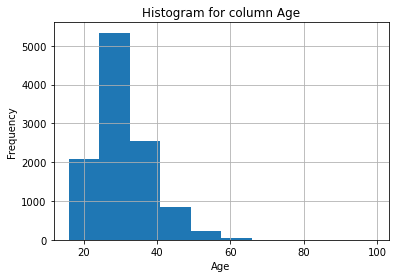

In [40]:
# your code goes here
hist_plot = df['Age'].hist()
hist_plot.set_title('Histogram for column Age')
hist_plot.set_xlabel('Age')
hist_plot.set_ylabel('Frequency')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


AxesSubplot(0.125,0.125;0.775x0.755)
count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64


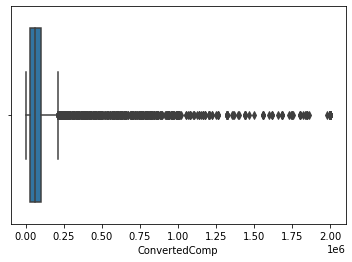

In [76]:
# your code goes here
#df['ConvertedComp'].plot(kind='box')
import seaborn as sns
print(sns.boxplot(df['ConvertedComp']))
print(df['ConvertedComp'].describe())

AxesSubplot(0.125,0.125;0.775x0.755)


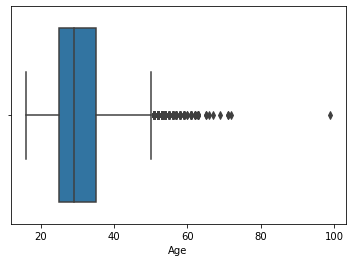

In [120]:
print(sns.boxplot(df['Age']))

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [81]:
# your code goes here
q3 = df['ConvertedComp'].quantile(.75)
q1 = df['ConvertedComp'].quantile(.25)
iqr = q3 - q1
print('Inter Quartile Range:',iqr)

Inter Quartile Range: 73132.0


Find out the upper and lower bounds.


In [82]:
# your code goes here
print('Lower Bound',df['ConvertedComp'].min())
print('Upper Bound',df['ConvertedComp'].max())

Lower Bound 0.0
Upper Bound 2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [83]:
# your code goes here
lower_fence = q1 - (1.5 * iqr)
upper_fence = q3 + (1.5 * iqr)
#finding outliers
print(df['ConvertedComp'][df['ConvertedComp'] > upper_fence].count())
print(df['ConvertedComp'][df['ConvertedComp'] < lower_fence].count())
#879 outliers

879
0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [117]:
# your code goes here
df2 = df[(df['ConvertedComp'] < upper_fence) & (df['ConvertedComp'] > lower_fence)]
print(df2['ConvertedComp'].count())
print(df['ConvertedComp'].count())
print(10582-9703)

9703
10582
879


In [121]:
df2['ConvertedComp'].median()
df2['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


(0.0, 26398.9)

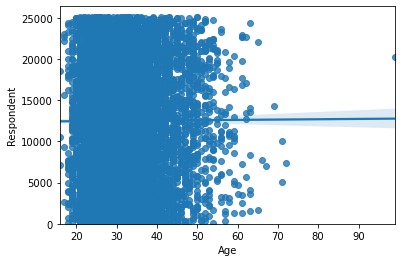

In [142]:
# your code goes here
sns.regplot(x='Age', y='Respondent', data=df)
plt.ylim(0,)

(0.0, 735001474.977674)

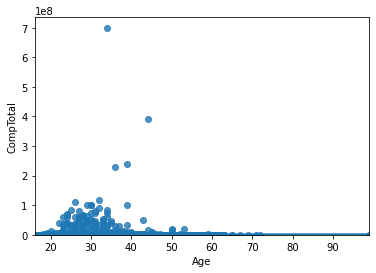

In [143]:
sns.regplot(x='Age', y='CompTotal', data=df)
plt.ylim(0,)

(0.0, 103.15)

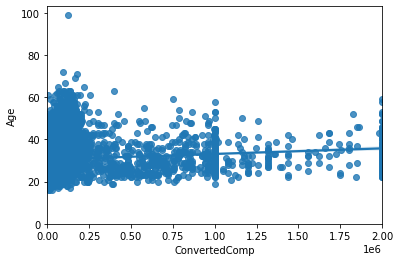

In [139]:
sns.regplot(x='ConvertedComp', y='Age', data=df)
plt.ylim(0,)

(0.0, 103.15)

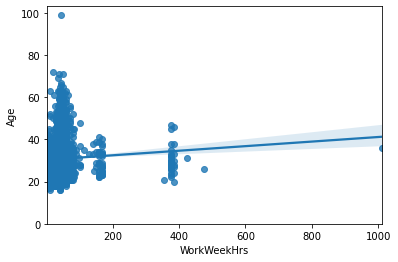

In [138]:
sns.regplot(x='WorkWeekHrs', y='Age', data=df)
plt.ylim(0,)

(0.0, 103.15)

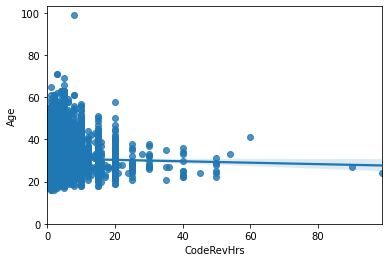

In [137]:
sns.regplot(x='CodeRevHrs', y='Age', data=df)
plt.ylim(0,)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
